In [2]:
import json

import numpy as np
import pandas as pd
from matplotlib.figure import Figure

In [3]:
%matplotlib

Using matplotlib backend: module://matplotlib_inline.backend_inline


In [9]:
def build_table(sect):
  dtemp = sect['data']
  cn = [d['name'] for d in dtemp['columns']]

  df = pd.DataFrame.from_records(dtemp['datasets'], columns=cn)
  return df

In [69]:
def gather_contig_data(f):
  with open(f) as inp:
      data = json.load(inp)
  data = data['By Sample']

  vs_df = build_table(data['Variant Summary'])
  targets = ['nSNPs', 'nInsertions', 'nDeletions', 'nHets', 'nHomRef', 'nHomVar', 'nSingletons']
  vs_df.set_index(['Filter', 'Sample'], inplace=True)
  vs_df = vs_df.loc['called'][targets]

  si_df = build_table(data['SNP/Indel Summary'])
  targets = ['ratio_of_1_and_2_to_3_bp_insertions',
        'ratio_of_1_and_2_to_3_bp_deletions']
  si_df.set_index(['Filter', 'Sample'], inplace=True)
  si_df = si_df.loc['called'][targets]

  tt_df = build_table(data['Ti/Tv Data'])
  targets = ['nTi', 'nTv', 'tiTvRatio']
  tt_df.set_index(['Filter', 'Sample'], inplace=True)
  tt_df = tt_df.loc['called'][targets]

  cdf = vs_df.join(si_df).join(tt_df)
  return cdf

In [ ]:
thelist = "gs://fc-383cdc04-2139-475e-ad85-406c08033859/submissions/075c13bd-8b0e-4154-93a9-c52fd5472718/VariantQC/e52fa9d9-40d0-48c1-8642-b5f9afd0c359/call-variantqc/shard-0/attempt-4/1KGQ_all_phased.sharded.0_101991189.vqc.json, gs://fc-383cdc04-2139-475e-ad85-406c08033859/submissions/075c13bd-8b0e-4154-93a9-c52fd5472718/VariantQC/e52fa9d9-40d0-48c1-8642-b5f9afd0c359/call-variantqc/shard-1/attempt-4/1KGQ_all_phased.sharded.0_107043718.vqc.json, gs://fc-383cdc04-2139-475e-ad85-406c08033859/submissions/075c13bd-8b0e-4154-93a9-c52fd5472718/VariantQC/e52fa9d9-40d0-48c1-8642-b5f9afd0c359/call-variantqc/shard-2/attempt-4/1KGQ_all_phased.sharded.0_114364328.vqc.json, gs://fc-383cdc04-2139-475e-ad85-406c08033859/submissions/075c13bd-8b0e-4154-93a9-c52fd5472718/VariantQC/e52fa9d9-40d0-48c1-8642-b5f9afd0c359/call-variantqc/shard-3/attempt-4/1KGQ_all_phased.sharded.0_133275309.vqc.json, gs://fc-383cdc04-2139-475e-ad85-406c08033859/submissions/075c13bd-8b0e-4154-93a9-c52fd5472718/VariantQC/e52fa9d9-40d0-48c1-8642-b5f9afd0c359/call-variantqc/shard-4/attempt-4/1KGQ_all_phased.sharded.0_133797422.vqc.json, gs://fc-383cdc04-2139-475e-ad85-406c08033859/submissions/075c13bd-8b0e-4154-93a9-c52fd5472718/VariantQC/e52fa9d9-40d0-48c1-8642-b5f9afd0c359/call-variantqc/shard-5/attempt-4/1KGQ_all_phased.sharded.0_135086622.vqc.json, gs://fc-383cdc04-2139-475e-ad85-406c08033859/submissions/075c13bd-8b0e-4154-93a9-c52fd5472718/VariantQC/e52fa9d9-40d0-48c1-8642-b5f9afd0c359/call-variantqc/shard-6/attempt-4/1KGQ_all_phased.sharded.0_138394717.vqc.json, gs://fc-383cdc04-2139-475e-ad85-406c08033859/submissions/075c13bd-8b0e-4154-93a9-c52fd5472718/VariantQC/e52fa9d9-40d0-48c1-8642-b5f9afd0c359/call-variantqc/shard-7/attempt-4/1KGQ_all_phased.sharded.0_145138636.vqc.json, gs://fc-383cdc04-2139-475e-ad85-406c08033859/submissions/075c13bd-8b0e-4154-93a9-c52fd5472718/VariantQC/e52fa9d9-40d0-48c1-8642-b5f9afd0c359/call-variantqc/shard-8/attempt-4/1KGQ_all_phased.sharded.0_159345973.vqc.json, gs://fc-383cdc04-2139-475e-ad85-406c08033859/submissions/075c13bd-8b0e-4154-93a9-c52fd5472718/VariantQC/e52fa9d9-40d0-48c1-8642-b5f9afd0c359/call-variantqc/shard-9/attempt-4/1KGQ_all_phased.sharded.0_170805979.vqc.json, gs://fc-383cdc04-2139-475e-ad85-406c08033859/submissions/075c13bd-8b0e-4154-93a9-c52fd5472718/VariantQC/e52fa9d9-40d0-48c1-8642-b5f9afd0c359/call-variantqc/shard-10/attempt-4/1KGQ_all_phased.sharded.0_181538259.vqc.json, gs://fc-383cdc04-2139-475e-ad85-406c08033859/submissions/075c13bd-8b0e-4154-93a9-c52fd5472718/VariantQC/e52fa9d9-40d0-48c1-8642-b5f9afd0c359/call-variantqc/shard-11/attempt-4/1KGQ_all_phased.sharded.0_190214555.vqc.json, gs://fc-383cdc04-2139-475e-ad85-406c08033859/submissions/075c13bd-8b0e-4154-93a9-c52fd5472718/VariantQC/e52fa9d9-40d0-48c1-8642-b5f9afd0c359/call-variantqc/shard-12/attempt-4/1KGQ_all_phased.sharded.0_198295559.vqc.json, gs://fc-383cdc04-2139-475e-ad85-406c08033859/submissions/075c13bd-8b0e-4154-93a9-c52fd5472718/VariantQC/e52fa9d9-40d0-48c1-8642-b5f9afd0c359/call-variantqc/shard-13/attempt-4/1KGQ_all_phased.sharded.0_242193529.vqc.json, gs://fc-383cdc04-2139-475e-ad85-406c08033859/submissions/075c13bd-8b0e-4154-93a9-c52fd5472718/VariantQC/e52fa9d9-40d0-48c1-8642-b5f9afd0c359/call-variantqc/shard-14/attempt-4/1KGQ_all_phased.sharded.0_248956422.vqc.json, gs://fc-383cdc04-2139-475e-ad85-406c08033859/submissions/075c13bd-8b0e-4154-93a9-c52fd5472718/VariantQC/e52fa9d9-40d0-48c1-8642-b5f9afd0c359/call-variantqc/shard-15/attempt-4/1KGQ_all_phased.sharded.0_46709983.vqc.json, gs://fc-383cdc04-2139-475e-ad85-406c08033859/submissions/075c13bd-8b0e-4154-93a9-c52fd5472718/VariantQC/e52fa9d9-40d0-48c1-8642-b5f9afd0c359/call-variantqc/shard-16/attempt-4/1KGQ_all_phased.sharded.0_50818468.vqc.json, gs://fc-383cdc04-2139-475e-ad85-406c08033859/submissions/075c13bd-8b0e-4154-93a9-c52fd5472718/VariantQC/e52fa9d9-40d0-48c1-8642-b5f9afd0c359/call-variantqc/shard-17/attempt-4/1KGQ_all_phased.sharded.0_58617616.vqc.json, gs://fc-383cdc04-2139-475e-ad85-406c08033859/submissions/075c13bd-8b0e-4154-93a9-c52fd5472718/VariantQC/e52fa9d9-40d0-48c1-8642-b5f9afd0c359/call-variantqc/shard-18/attempt-4/1KGQ_all_phased.sharded.0_64444167.vqc.json, gs://fc-383cdc04-2139-475e-ad85-406c08033859/submissions/075c13bd-8b0e-4154-93a9-c52fd5472718/VariantQC/e52fa9d9-40d0-48c1-8642-b5f9afd0c359/call-variantqc/shard-19/attempt-4/1KGQ_all_phased.sharded.0_80373285.vqc.json, gs://fc-383cdc04-2139-475e-ad85-406c08033859/submissions/075c13bd-8b0e-4154-93a9-c52fd5472718/VariantQC/e52fa9d9-40d0-48c1-8642-b5f9afd0c359/call-variantqc/shard-20/attempt-4/1KGQ_all_phased.sharded.0_83257441.vqc.json, gs://fc-383cdc04-2139-475e-ad85-406c08033859/submissions/075c13bd-8b0e-4154-93a9-c52fd5472718/VariantQC/e52fa9d9-40d0-48c1-8642-b5f9afd0c359/call-variantqc/shard-21/attempt-4/1KGQ_all_phased.sharded.0_90338345.vqc.json"
for f in thelist.split(', '):
  !gsutil cp $f ./vqc_1kgq_all_json/

Copying gs://fc-383cdc04-2139-475e-ad85-406c08033859/submissions/075c13bd-8b0e-4154-93a9-c52fd5472718/VariantQC/e52fa9d9-40d0-48c1-8642-b5f9afd0c359/call-variantqc/shard-0/attempt-4/1KGQ_all_phased.sharded.0_101991189.vqc.json...
/ [0 files][    0.0 B/ 18.4 MiB]                                                
-
- [0 files][ 11.9 MiB/ 18.4 MiB]                                                
\
\ [1 files][ 18.4 MiB/ 18.4 MiB]                                                

Operation completed over 1 objects/18.4 MiB.                                     
Copying gs://fc-383cdc04-2139-475e-ad85-406c08033859/submissions/075c13bd-8b0e-4154-93a9-c52fd5472718/VariantQC/e52fa9d9-40d0-48c1-8642-b5f9afd0c359/call-variantqc/shard-1/attempt-4/1KGQ_all_phased.sharded.0_107043718.vqc.json...
/ [0 files][    0.0 B/ 18.4 MiB]                                                
-
- [0 files][ 14.1 MiB/ 18.4 MiB]                                                
- [1 files][ 18.4 MiB/ 18.4 MiB]              

In [ ]:
form = 'vqc_1kgq_all_json/1KGQ_all_phased.sharded.{}.vqc.json'

In [52]:
with open('hg38_wg.bed') as inp:
  lines = inp.readlines()

cmap = {c: f'{s}_{e}' for c,s,e in map(lambda x:x.split(), lines)}

In [71]:
bigmap = {}
for c in sorted(cmap, key=lambda x:int(x[3:])):
  bigmap[c] = gather_contig_data(form.format(cmap[c]))

In [73]:
bdf = pd.concat(bigmap)

In [74]:
bdf.columns

Index(['nSNPs', 'nInsertions', 'nDeletions', 'nHets', 'nHomRef', 'nHomVar',
       'nSingletons', 'ratio_of_1_and_2_to_3_bp_insertions',
       'ratio_of_1_and_2_to_3_bp_deletions', 'nTi', 'nTv', 'tiTvRatio'],
      dtype='object')

In [93]:
bdf['ratio_of_1_and_2_to_3_bp_deletions'] = bdf['ratio_of_1_and_2_to_3_bp_deletions'].astype('float')
bdf['ratio_of_1_and_2_to_3_bp_insertions'] = bdf['ratio_of_1_and_2_to_3_bp_insertions'].astype('float')

In [118]:
bdf['tiTvRatio'] = bdf['nTi'] / bdf['nTv']

In [116]:
def perc_hist(bcf, c, n=None):
  try:
    axs = bdf[c].unstack(level=0).hist(figsize=(13,13), bins=20)
  except ValueError:
    print(c, 'had an issue')
  fig = axs[0][0].figure
  fig.suptitle(f'{c} per Contig')
  fig.set_layout_engine('constrained')
  if n: fig.savefig(n)

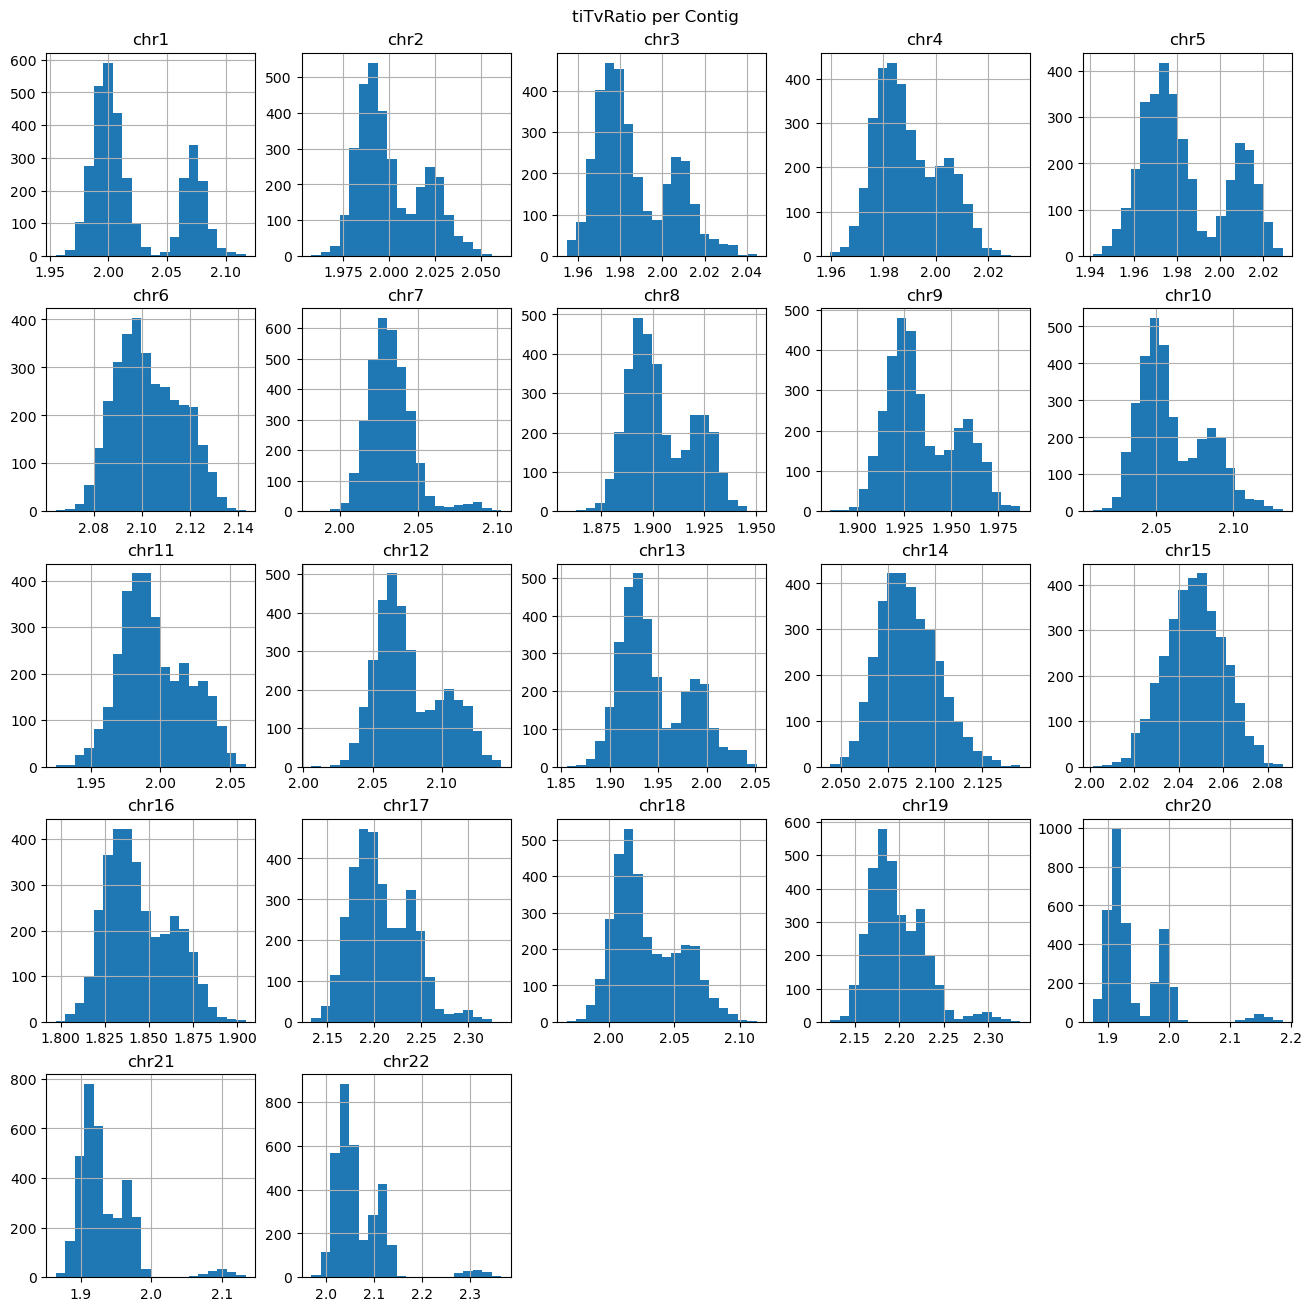

In [119]:
baseform = 'vqc_1kgq_all/graphs/1KGQ_all_phased_{}.png'

for c in ['tiTvRatio']:# bdf.columns:
  perc_hist(bdf, c, baseform.format(c))

In [ ]:
toSum = ['nSNPs', 'nInsertions', 'nDeletions', 'nHets', 'nHomRef', 'nHomVar', 'nSingletons', 'nTi', 'nTv']

In [104]:
sdf = bdf[toSum].groupby(level=1).sum()

In [106]:
sdf['nIndels'] = sdf['nDeletions'] + sdf['nInsertions']
sdf['Ts/Tv'] = sdf['nTi']/sdf['nTv']

array([[<Axes: title={'center': 'nTi'}>, <Axes: title={'center': 'nTv'}>,
        <Axes: title={'center': 'nIndels'}>],
       [<Axes: title={'center': 'nHets'}>,
        <Axes: title={'center': 'nHomVar'}>,
        <Axes: title={'center': 'nHomRef'}>],
       [<Axes: title={'center': 'nSingletons'}>, <Axes: >, <Axes: >]],
      dtype=object)

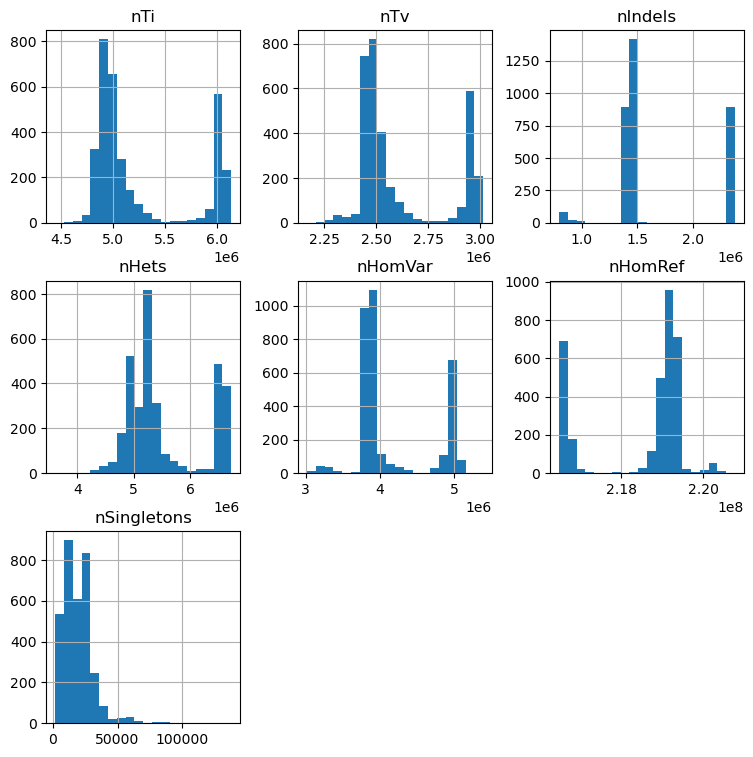

In [109]:
order = ['nTi', 'nTv', 'nIndels', 'nHets', 'nHomVar', 'nHomRef', 'nSingletons']
sdf[order].hist(figsize=(9,9), bins=20)

array([[<Axes: title={'center': 'nSNPs'}>,
        <Axes: title={'center': 'nInsertions'}>],
       [<Axes: title={'center': 'nDeletions'}>, <Axes: >]], dtype=object)

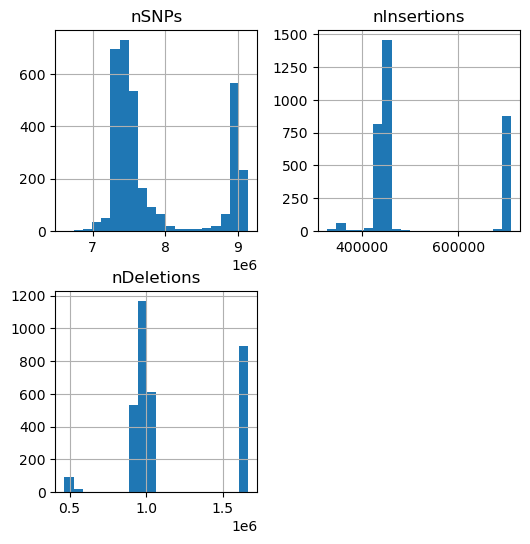

In [112]:
order = ['nSNPs', 'nInsertions', 'nDeletions']
sdf[order].hist(figsize=(6,6), bins=20)

[Text(0.5, 1.0, 'Per Sample Ts/Tv'),
 Text(0, 0.5, '# Samples'),
 Text(0.5, 0, 'Ts/Tv')]

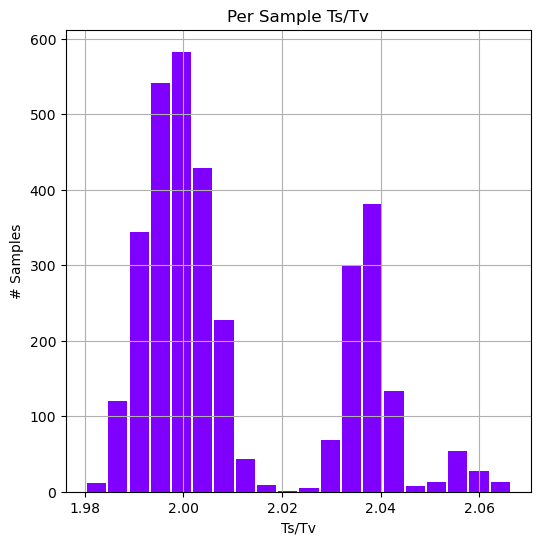

In [115]:
axs = sdf['Ts/Tv'].hist(figsize=(6,6), bins=20, color="#7f00ff", rwidth=0.9)
axs.set(title='Per Sample Ts/Tv',
        ylabel='# Samples',
        xlabel='Ts/Tv')